# Prapare work

## Import libraries

In [32]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sympy
import pickle
import os.path
from robot_def import RobotDef
from kinematics import Geometry
from dynamics import Dynamics
from trajectory_optimization import TrajOptimizer
from trajectory_optimization import TrajPlotter
from utils import new_sym
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Folder dir for saving and loading files

In [30]:
model_folder = 'data/model/'
trajectory_folder = 'data/trajectory/'
optimal_trajectory_folder = 'data/optimal_trajectory/'

## Create joint variables and define their relations

In [6]:
q0, q1, q2, q3, q4, q5, q6, q7, q8, q9 = new_sym('q:10')
# q3 = -q2 + q8
# q9 = -q8 + q2

## DH definition in the order of joint_type, a, alpha, d, theta, dh_type, prev, succ

In [7]:
robot_def = RobotDef([(0,   -1, [1],    0,      0,              0,          0),
                      (1,   0,  [2],    0,      0,              -0.21537,   q1),
                      (2,   1,  [3],    0,      -sympy.pi/2,    0,          q2+sympy.pi/2),
                      (3,   2,  [4],    0.279,  0,              0,          q3 + sympy.pi / 2)],
                     dh_convention='mdh',
                     friction_type=['Coulomb', 'viscous', 'offset'])

[q1, q2, q3]


In [10]:
robot_def.m

[0, m1, m2, m3]

## Create kinematics chain

pos_c1
v_cw1
dR_t1
subs dq1
w_b
pos_c2
v_cw2


dR_t2
subs dq2
w_b


pos_c3
v_cw3


dR_t3
subs dq3
w_b


pos_c
[0, Matrix([
[l1x*cos(q1)/m1 - l1y*sin(q1)/m1],
[l1x*sin(q1)/m1 + l1y*cos(q1)/m1],
[               l1z/m1 - 0.21537]]), Matrix([
[-l2x*sin(q2)*cos(q1)/m2 - l2y*cos(q1)*cos(q2)/m2 - l2z*sin(q1)/m2],
[-l2x*sin(q1)*sin(q2)/m2 - l2y*sin(q1)*cos(q2)/m2 + l2z*cos(q1)/m2],
[                       -l2x*cos(q2)/m2 + l2y*sin(q2)/m2 - 0.21537]]), Matrix([
[l3x*(sin(q2)*sin(q3)*cos(q1) - cos(q1)*cos(q2)*cos(q3))/m3 + l3y*(sin(q2)*cos(q1)*cos(q3) + sin(q3)*cos(q1)*cos(q2))/m3 - l3z*sin(q1)/m3 - 0.279*sin(q2)*cos(q1)],
[l3x*(sin(q1)*sin(q2)*sin(q3) - sin(q1)*cos(q2)*cos(q3))/m3 + l3y*(sin(q1)*sin(q2)*cos(q3) + sin(q1)*sin(q3)*cos(q2))/m3 + l3z*cos(q1)/m3 - 0.279*sin(q1)*sin(q2)],
[                                              l3x*(sin(q2)*cos(q3) + sin(q3)*cos(q2))/m3 + l3y*(-sin(q2)*sin(q3) + cos(q2)*cos(q3))/m3 - 0.279*cos(q2) - 0.21537]])]
v_cw
[0, Matrix([
[-dq1*(l1x*sin(q1) + l1y*cos(q1))/m1],
[ dq1*(l1x*cos(q1) - l1y*sin(q1))/m1],
[                                  0]]), Matrix([
[ (dq1*

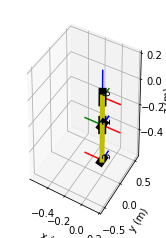

In [11]:
geom = Geometry(robot_def)


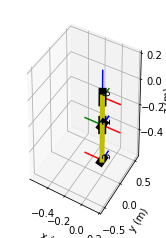

In [12]:
geom.draw_geom()

## Create dynamics object


In [ ]:
dyn = Dynamics(robot_def, geom)


## Trajectory Optimization

### Create trajectory optimizer object, with H matrix, foourier order, base frequency, joint constraints and cartisian constraints as input

In [23]:
base_freq = 0.1
fourier_order = 6

traj_optimizer = TrajOptimizer(dyn, fourier_order, base_freq,
                               joint_constraints=[(q1, -np.pi/2, np.pi/2, -2*np.pi, 2*np.pi),
                                                  (q2, -np.pi/2, np.pi/2, -2*np.pi, 2*np.pi)])
traj_optimizer.optimize()

('joint constraint number: ', 2)
('cartisian constraint number: ', 0)
('constraint number: ', 8)
fourier_q_base:
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.59154943e+00
  -7.95774715e-01 -5.30516477e-01 -3.97887358e-01 -3.18309886e-01
  -2.65258238e-01]
 [ 1.00000000e+00  1.38712673e-01  1.38184829e-01  1.37307768e-01
   1.36085491e-01  1.34523571e-01  1.32629119e-01 -1.58549310e+00
  -7.83685109e-01 -5.12439566e-01 -3.73891814e-01 -2.88486729e-01
  -2.29720373e-01]
 [ 1.00000000e+00  2.76369658e-01  2.72170982e-01  2.65258238e-01
   2.55757064e-01  2.43839520e-01  2.29720373e-01 -1.56737022e+00
  -7.47783628e-01 -4.59440746e-01 -3.04799399e-01 -2.04605651e-01
  -1.32629119e-01]
 [ 1.00000000e+00  4.11923304e-01  3.97887358e-01  3.75131798e-01
   3.44580560e-01  3.07463740e-01  2.65258238e-01 -1.53731870e+00
  -6.89161119e-01 -3.75131798e-01 -1.98943679e-01 -8.23846608e-02
  -1.62423826e-17]
 [ 1.00000000e+00  

('fstr: ', array([3.57278233]))
('xstr: ', array([ 0.36461486,  0.12339075,  1.        , -0.77571296, -1.        ,
        1.        ,  1.        ,  0.32440905, -0.16870638,  1.        ,
        0.91676898,  1.        ,  1.        ,  0.32320409,  0.03483997,
        0.9209697 ,  0.26153524, -0.16027862, -0.43494838,  1.        ,
        0.02395702, -0.98747981,  0.31310147,  0.97474749,  0.10869378,
       -1.        ,  3.14159265,  0.9834564 ,  0.3544987 ,  0.51210192,
        0.90650866,  0.55026673, -0.41620878, -0.30754773, -0.044976  ,
        1.        , -0.100111  , -0.94387813,  1.        ]))
('inform: ', {'text': 'Iteration limit exceeded', 'value': 9})

SLSQP Solution to Optimial Excitation Trajectory

        Objective Function: _obj_func

    Solution: 
--------------------------------------------------------------------------------
    Total Time:                    9.8191
    Total Function Evaluations:          
    Sensitivities:        FD

    Objectives:
        Name 

### Plot optimal excitation trajectory

('traj:', 0)
('traj:', 1)
('traj:', 2)


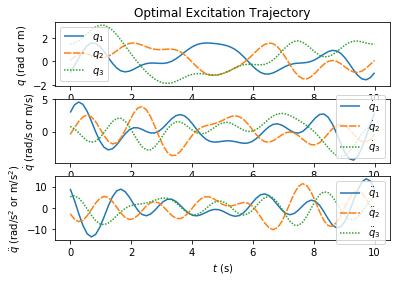

In [19]:
traj_plotter = TrajPlotter(traj_optimizer.fourier_traj)
traj_plotter.plot_desired_traj(traj_optimizer.x_result)

### Save trajectory for later use

In [29]:
dof_order_bf_x = (traj_optimizer.fourier_traj.dof, fourier_order, base_freq, traj_optimizer.x_result)


In [34]:
dof_order_bf_x_file_name = 'optimal_traj1.pkl'
dof_order_bf_x_dir = optimal_trajectory_folder + dof_order_bf_x_file_name

#if not os.path.exists(dof_order_bf_x_dir):
with open(dof_order_bf_x_dir, 'wr') as f:
    pickle.dump(dyn.H_b, f)

# 